In [1]:
!pip install dask-ml

In [2]:
!pip install dask

In [0]:
!pip install dask-ml[xgboost] 
!pip install dask-ml[tensorflow]
!pip install dask-ml[complete]

    100% |████████████████████████████████| 593kB 538kB/s ta 0:00:01
    100% |████████████████████████████████| 7.0MB 336kB/s ta 0:00:01
    100% |████████████████████████████████| 788kB 438kB/s ta 0:00:01
    100% |████████████████████████████████| 20.1MB 194kB/s ta 0:00:01
    100% |████████████████████████████████| 142.8MB 365kB/s ta 0:00:011
    100% |████████████████████████████████| 296kB 1.1MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 1.4MB/s ta 0:00:01
tables 3.5.1 requires mock>=2.0, which is not installed.
  Found existing installation: numpy 1.16.2
    Uninstalling numpy-1.16.2:
      Successfully uninstalled numpy-1.16.2
  Found existing installation: dask 1.1.4
    Uninstalling dask-1.1.4:
      Successfully uninstalled dask-1.1.4
  Found existing installation: distributed 1.26.0
    Uninstalling distributed-1.26.0:
      Successfully uninstalled distributed-1.26.0
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:

    100% |████████████████████████████████| 421.8MB 114kB/s ta 0:00:011   19% |██████▏                         | 80.6MB 1.1MB/s eta 0:05:18    49% |████████████████                | 210.2MB 507kB/s eta 0:06:57    54% |█████████████████▎              | 227.9MB 1.2MB/s eta 0:02:44    66% |█████████████████████▍          | 281.7MB 1.4MB/s eta 0:01:44    73% |███████████████████████▊        | 312.1MB 515kB/s eta 0:03:34    98% |███████████████████████████████▍| 414.1MB 583kB/s eta 0:00:14
    100% |████████████████████████████████| 3.8MB 984kB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 1.2MB/s ta 0:00:01
    100% |████████████████████████████████| 112kB 1.1MB/s ta 0:00:01
    100% |████████████████████████████████| 1.3MB 1.4MB/s ta 0:00:01
    100% |████████████████████████████████| 450kB 1.1MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 997kB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 1.2MB/s ta 0:00:01
    100% |████████████████████

    100% |████████████████████████████████| 92kB 1.8MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 1.5MB/s ta 0:00:01
    100% |████████████████████████████████| 163kB 1.1MB/s ta 0:00:01
    100% |████████████████████████████████| 153kB 1.6MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 1.5MB/s ta 0:00:01
  Stored in directory: /home/avinash/.cache/pip/wheels/2c/b1/94/43d03e130b929aae7ba3f8d15cbd7bc0d1cb5bb38a5c721833
  Stored in directory: /home/avinash/.cache/pip/wheels/8e/28/49/fad4e7f0b9a1227708cbbee4487ac8558a7334849cb81c813d
  Stored in directory: /home/avinash/.cache/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: /home/avinash/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built opt-einsum absl-py termcolor gast
tensorboard 2.1.0 has requirement setuptools>=41.0.0, but you'll have setuptools 40.8.0 which is incompatible.
tensorflow 2.1.0 has requirement s

## Dask Array

In [7]:
# import Dask Array
import dask.array as da    

# Create Dask Array using arange() function and generate values from 0 to 17
a = da.arange(18, chunks=4)

# Compute the array
a.compute() 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [8]:
# Check the chunk size
a.chunks

((4, 4, 4, 4, 2),)

## Dask DataFrames

In [9]:
# Read csv file using  pandas
import pandas as pd
%time temp = pd.read_csv("HR_comma_sep.csv") 

CPU times: user 29 ms, sys: 8.28 ms, total: 37.3 ms
Wall time: 139 ms


In [10]:
# Read csv file using Dask
import dask.dataframe as dd
%time df = dd.read_csv("HR_comma_sep.csv")

CPU times: user 51.2 ms, sys: 3.46 ms, total: 54.6 ms
Wall time: 52.5 ms


### DataFrame Indexing

In [43]:
# Import Dask and Pandas DataFrame
import dask.dataframe as dd
import pandas as pd

# Create Pandas DataFrame
df = pd.DataFrame({"P": [10, 20, 30], "Q": [40, 50, 60]},
                  index=['p', 'q', 'r'])

# Create Dask DataFrame
ddf = dd.from_pandas(df, npartitions=2)

# Check top records
ddf.head()

/home/avinash/anaconda3/lib/python3.7/site-packages/dask/dataframe/core.py:5890: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,P,Q
p,10,40
q,20,50
r,30,60


In [46]:
# Single Column Selection
ddf['P']

Dask Series Structure:
npartitions=1
p    int64
r      ...
Name: P, dtype: int64
Dask Name: getitem, 2 tasks

In [47]:
# Multiple Column Selection
ddf[['Q', 'P']]

,Q,P
npartitions=1,,
p,int64,int64
r,...,...


In [48]:
# Import Dask and Pandas DataFrame
import dask.dataframe as dd
import pandas as pd

# Create Pandas DataFrame
df = pd.DataFrame({"X": [11, 12, 13], "Y": [41, 51, 61]})

# Create Dask DataFrame
ddf = dd.from_pandas(df, npartitions=2)

# Check top records
ddf.head()

/home/avinash/anaconda3/lib/python3.7/site-packages/dask/dataframe/core.py:5890: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,X,Y
0,11,41
1,12,51
2,13,61


In [49]:
ddf.iloc[:, [1, 0]].compute()

,Y,X
0,41,11
1,51,12
2,61,13


In [50]:
ddf.iloc[0:4, [1, 0]].compute()

NotImplementedError: 'DataFrame.iloc' only supports selecting columns. It must be used like 'df.iloc[:, column_indexer]'.

### Filter data

In [3]:
# Import Dask DataFrame
import dask.dataframe as dd

# Read CSV file
ddf = dd.read_csv('HR_comma_sep.csv')

# See top 5 records
ddf.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# Filter employee with low salary
ddf2 = ddf[ddf.salary == 'low']
ddf2.compute().head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low


In [5]:
# Find average values of all the columns for employee left or stayed 
ddf.groupby('left').mean().compute()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## Dask Bags

### Creating Dask bag using Python Iterable items

In [41]:
# Import dask bag
import dask.bag as db

# Create a bag of list items
items_bag = db.from_sequence([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], npartitions=3)

# Take initial two items
items_bag.take(2)

(1, 2)

In [42]:
# Filter the bag of list items
items_square=items_bag.filter(lambda x: x if x % 2 != 0 else None)

# Compute the results
items_square.compute()

[1, 3, 5, 7, 9]

In [9]:
# Square the bag of list items
items_square=items_b.map(lambda x: x**2)

# Compute the results
items_square.compute()

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

### Creating Dask Bag using text file

In [11]:
# Import dask bag
import dask.bag as db

# Create a bag of text file
text = db.read_text('sample.txt')

# Show initial 1 items from text
text.take(2)

('Hi! how are you? \n', '\n')

### Storing Dask Bag into text file

In [18]:
# Convert dask bag object into text file
text.to_textfiles('*.txt.gz')

['/home/avinash/Documents/notebooks/packt/ch14/0.txt.gz']

### Storing Dask Bag into DataFrame

In [16]:
# Import dask bag
import dask.bag as db

# Create a bag of dictionary items
dict_bag = db.from_sequence([{'item_name': 'Egg', 'price': 5},
                      {'item_name': 'Bread', 'price': 20},
                      {'item_name': 'Milk', 'price': 54}],
                      npartitions=2)

# Convert bag object into dataframe
df = dict_bag.to_dataframe()

# Execute the graph results
df.compute()


,item_name,price
0,Egg,5
1,Bread,20
0,Milk,54


## Dask Delayed

In [18]:
# Import dask delayed and compute
from dask import delayed, compute

# Create delayed function
@delayed
def cube(item):
    return item ** 3

# Create delayed function
@delayed
def average(items):
    return sum(items)/len(items)

# create a list
item_list = [2, 3, 4]

# Compute cube of given item list
cube_list= [cube(i) for i in item_list]

# Compute average of cube_list
computation_graph = average(cube_list)

# Compute the results
computation_graph.compute()

33.0

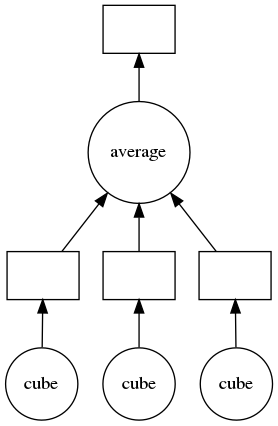

In [19]:
# Visualize the graph
computation_graph.visualize()

## Preprocessing

### Feature Scaling

In [20]:
# Import Dask DataFrame
import dask.dataframe as dd

# Read CSV file
ddf = dd.read_csv('HR_comma_sep.csv')

# See top 5 records
ddf.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate the MinMaxScaler Object
scaler = MinMaxScaler(feature_range=(0, 100))

# Fit the data on Scaler
scaler.fit(ddf[['last_evaluation']])

# Transform the data
performance_score=scaler.transform(ddf[['last_evaluation']])

# Let's see the scaled performance score
performance_score

### Feature Encoding

In [21]:
# Import Dask DataFrame
import dask.dataframe as dd

# Read CSV file
ddf = dd.read_csv('HR_comma_sep.csv')

# See top 5 records
ddf.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
# Import Onehot Encoder
from dask_ml.preprocessing import Categorizer
from dask_ml.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

# Create pipeline with Categorizer and OneHotEncoder
pipe = make_pipeline(
    Categorizer(), OneHotEncoder())

# Fit and transform the Categorizer and OneHotEncoder
pipe.fit(ddf[['salary',]])
result=pipe.transform(ddf[['salary',]])

# See top 5 records
result.head()

,salary_low,salary_medium,salary_high
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [23]:
# Import Onehot Encoder
from dask_ml.preprocessing import Categorizer
from dask_ml.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline

# Create pipeline with Categorizer and OrdinalEncoder
pipe = make_pipeline(
    Categorizer(), OrdinalEncoder())

# Fit and transform the Categorizer and OneHotEncoder
pipe.fit(ddf[['salary',]])
result=pipe.transform(ddf[['salary',]])

# Let's see encoded results
result.head()


,salary
0,0
1,1
2,1
3,0
4,0


## Machine Learning

### Parallel Computing using Scikit-learn 

In [24]:
# Import Dask DataFrame
import pandas as pd

# Read CSV file
df = pd.read_csv('/home/avinash/Documents/data/HR_comma_sep.csv')

# See top 5 records
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [25]:
# select the feature and target columns
data=df[['satisfaction_level', 'last_evaluation']]
label=df['left']

In [26]:
# Import client
from dask.distributed import Client 

# Instantiate the Client
client = Client() 

In [28]:
# import dask_ml.joblib
from sklearn.externals.joblib import parallel_backend

with parallel_backend('dask'):
    # Write normal scikit-learn code here
    from sklearn.ensemble import RandomForestClassifier 
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    
    # Split data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(data, label, 
                                                    test_size=0.2, 
                                                    random_state=0)
    # Instantiate RandomForest Model
    model = RandomForestClassifier()
    
    # Fit the model
    model.fit(X_train,y_train)
    
    # Predict the classes
    y_pred = model.predict(X_test)
    
    # Find model accuracy
    print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.92


### Reimplementing ML Algorithms for Dask

In [19]:
# Read CSV file using Dask
import dask.dataframe as dd

# Read Human Resource Data
ddf = dd.read_csv("HR_comma_sep.csv")

# Let's see top 5 records
ddf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [20]:
data=ddf[['satisfaction_level', 'last_evaluation']].to_dask_array(lengths=True)
label=ddf['left'].to_dask_array(lengths=True)

In [27]:
# Import Dask based LogisticRegression 
from dask_ml.linear_model import LogisticRegression

# Import accuracy score metric
from sklearn.metrics import accuracy_score

# Import Dask based train_test_split
from dask_ml.model_selection import train_test_split

# Divide the data into two parts: training and testing set
X_train, X_test, y_train, y_test = train_test_split(data, label)

In [28]:
# Create logistic regression model
model = LogisticRegression()

# Fit the model
model.fit(X_train,y_train)

# Predict the classes
y_pred = model.predict(X_test)

# Find model accuracy
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.752


### Clustering

In [33]:
# Read CSV file using Dask
import dask.dataframe as dd

# Read Human Resource Data
ddf = dd.read_csv("HR_comma_sep.csv")

# Let's see top 5 records
ddf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [34]:
data=ddf[['satisfaction_level', 'last_evaluation']].to_dask_array(lengths=True)

In [35]:
# Import Dask based Kmeans
from dask_ml.cluster import KMeans

# Create the Kmeans model
model=KMeans(n_clusters=3)

# Fit the model 
model.fit(data)

# Predict the classes
label=model.labels_

# Compute the results
label.compute()

array([2, 1, 0, ..., 2, 0, 2], dtype=int32)

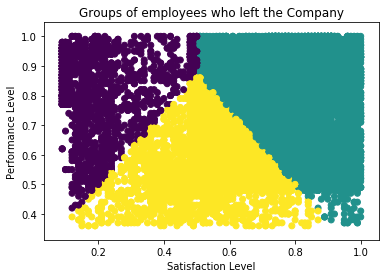

In [37]:
# Import matplotlib.pylpot
import matplotlib.pyplot as plt

# Prepare x,y and cluster_labels
x=data[:,0].compute()
y=data[:,1].compute()
cluster_labels=label.compute()

# Draw scatter plot
plt.scatter(x,y, c=cluster_labels)

# Add label on X-axis
plt.xlabel('Satisfaction Level')

# Add label on X-axis
plt.ylabel('Performance Level')

# Add a title to the graph
plt.title('Groups of employees who left the Company')

# Show the plot
plt.show()